In [1]:
import cv2
import os
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Pf8xS_gjFhWNBpz6sEfpmScItVFoc33p' -O with_all_our_love.zip

--2022-05-05 09:31:25--  https://docs.google.com/uc?export=download&id=1Pf8xS_gjFhWNBpz6sEfpmScItVFoc33p
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.139, 142.250.141.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f5rvcgchn6lgq7usanodp1e1mk56bhdl/1651743075000/07367728300116672257/*/1Pf8xS_gjFhWNBpz6sEfpmScItVFoc33p?e=download [following]
--2022-05-05 09:31:26--  https://doc-00-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f5rvcgchn6lgq7usanodp1e1mk56bhdl/1651743075000/07367728300116672257/*/1Pf8xS_gjFhWNBpz6sEfpmScItVFoc33p?e=download
Resolving doc-00-3g-docs.googleusercontent.com (doc-00-3g-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-00-3g-docs.googleusercontent.com (doc-00-3g-docs

In [5]:
!unzip -u  with_all_our_love.zip

Archive:  with_all_our_love.zip
  inflating: hearts 1.png            
  inflating: hearts 2.png            
  inflating: hearts 3.png            
  inflating: hearts 4.png            
  inflating: hearts 5.png            
  inflating: hearts 6.png            
  inflating: hearts 7.png            
  inflating: hearts 8.png            
  inflating: hearts 9.png            
  inflating: hearts 10.png           


In [6]:
!mkdir output

In [7]:
def show_images(input_image, output_image):
  plt.figure(figsize=(20,20))
  plt.subplot(121)
  plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
  plt.title("Input image")
  plt.subplot(122)
  plt.imshow(output_image,cmap='gray')
  plt.title("Output image")
  plt.show()

def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

def sobel_edge_getector(image_gray):
  kernel_X = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
  kernel_Y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  
  result_X = cv2.filter2D(image_gray, ddepth=-1, kernel=kernel_X)
  result_Y = cv2.filter2D(image_gray, ddepth=-1, kernel=kernel_Y)
  
  return result_X + result_Y

In [8]:
def get_hearts_1(color_image, output_name):
  image_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
  ret, img_thresh = cv2.threshold(image_gray,18, 255, cv2.THRESH_BINARY)
  image_output = cv2.erode(img_thresh, np.ones((3, 3), np.uint8), iterations=2)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_2(color_image, output_name):
  image_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 1)
  image_output = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=2)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output  

def get_hearts_3(color_image, output_name):
  blue, green, red = cv2.split(color_image)
  ret, img_thresh = cv2.threshold(green,100, 255, cv2.THRESH_BINARY)
  image_output = cv2.erode(img_thresh, np.ones((2, 2), np.uint8), iterations=1)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_4(color_image, output_name):
  yuv = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)
  y, u, v = cv2.split(yuv)
  ret, img_thresh = cv2.threshold(v, 115, 255, cv2.THRESH_BINARY)
  image_output = cv2.erode(img_thresh, np.ones((2, 2), np.uint8), iterations=1)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_5(color_image, output_name):
  image_closed = cv2.morphologyEx(color_image, cv2.MORPH_CLOSE, np.ones((5, 5),np.uint8), iterations=2)
  image_gray = cv2.cvtColor(image_closed, cv2.COLOR_BGR2GRAY)
  image_output = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 3)    
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output  

def get_hearts_6(color_image, output_name):
  image_closed = cv2.morphologyEx(color_image, cv2.MORPH_CLOSE, np.ones((3, 3),np.uint8), iterations=2)
  image_gray = cv2.cvtColor(image_closed, cv2.COLOR_BGR2GRAY)
  clahe_object = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
  clahed = clahe_object.apply(image_gray)
  thresh = cv2.adaptiveThreshold(clahed, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 2)
  image_closed_gray = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((5, 5),np.uint8), iterations=2)
  dilation = cv2.dilate(image_closed_gray,np.ones((3, 3),np.uint8),iterations = 2)
  image_output = cv2.medianBlur(dilation, 11)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_7(color_image, output_name):
  image_closed = cv2.morphologyEx(color_image, cv2.MORPH_CLOSE, np.ones((5, 5),np.uint8), iterations=1)
  image_gray = cv2.cvtColor(image_closed, cv2.COLOR_BGR2GRAY)
  clahe_object = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
  clahed = clahe_object.apply(image_gray)
  thresh = cv2.adaptiveThreshold(clahed, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 0)
  image_closed_gray = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3),np.uint8), iterations=1)
  dilation = cv2.dilate(image_closed_gray,np.ones((3, 3),np.uint8),iterations = 3)
  image_output = cv2.medianBlur(dilation, 11)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_8(color_image, output_name):
  image_closed = cv2.morphologyEx(color_image, cv2.MORPH_CLOSE, np.ones((5, 5),np.uint8), iterations=2)
  image_gray = cv2.cvtColor(image_closed, cv2.COLOR_BGR2GRAY)
  clahe_object = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  clahed = clahe_object.apply(image_gray)
  thresh = cv2.adaptiveThreshold(clahed, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 5)
  image_closed_gray = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3),np.uint8), iterations=3)
  image_output = cv2.dilate(image_closed_gray,np.ones((2, 2),np.uint8),iterations = 3)
  # image_output = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, np.ones((2, 2),np.uint8), iterations=2)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_9(color_image, output_name):
  image_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
  ret, img_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_OTSU)
  ret, img_thresh = cv2.threshold(img_thresh, 0, 255, cv2.THRESH_BINARY_INV)
  image_output = cv2.erode(img_thresh, np.ones((2, 2), np.uint8), iterations=1)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

def get_hearts_10(color_image, output_name):
  image_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
  sobeled = sobel_edge_getector(image_gray)

  contours, _ = cv2.findContours(sobeled, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros_like(image_gray)
  result = np.zeros_like(image_gray) + 255
  for contour in contours:
    cv2.drawContours(mask, [contour], 0, 255, thickness=-1)
    dst = cv2.bitwise_and(result, result, mask=mask)

  _,thresh = cv2.threshold(dst, 0, 255, cv2.THRESH_BINARY_INV)
  image_output = cv2.dilate(thresh,np.ones((2,2),np.uint8),iterations = 3)
  path = os.path.join(os.getcwd(), "output", output_name)
  cv2.imwrite(path, image_output)
  
  return image_output

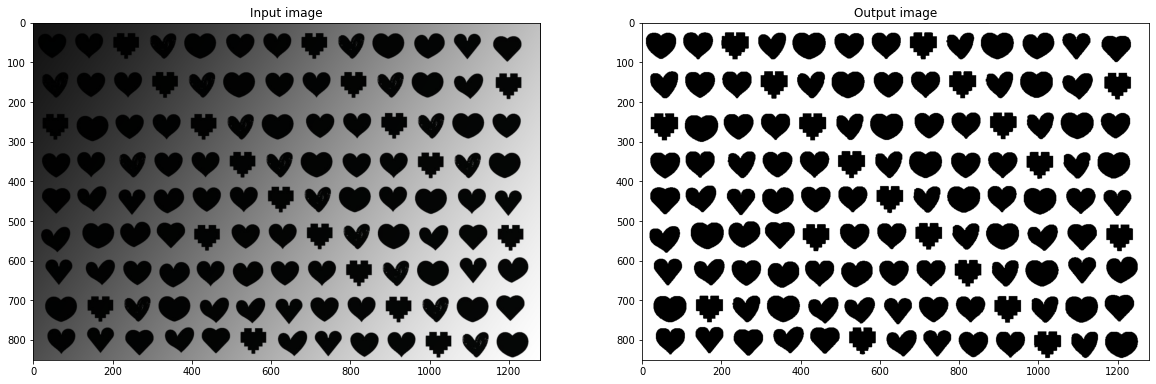

In [9]:
image_1 = cv2.imread("hearts 1.png")
output_1 = get_hearts_1(image_1, "output_1.png")
show_images(image_1, output_1)

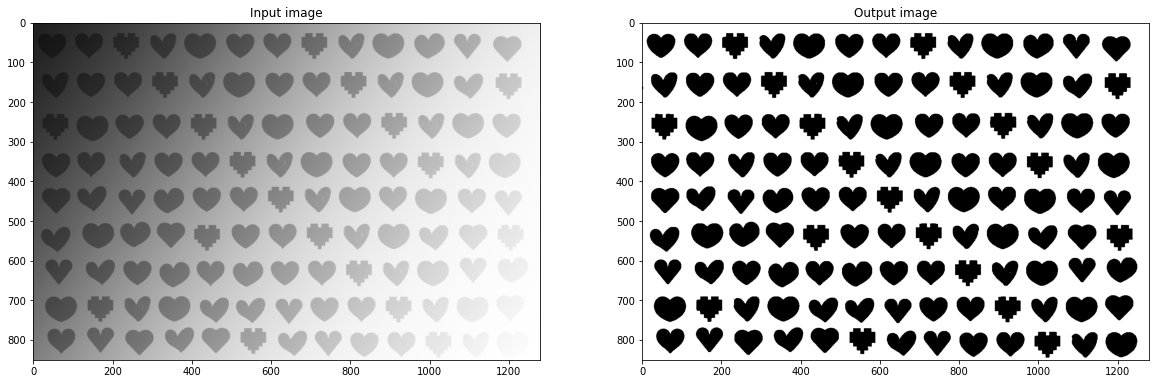

In [10]:
image_2 = cv2.imread("hearts 2.png")
output_2 = get_hearts_2(image_2, "output_2.png")
show_images(image_2, output_2)

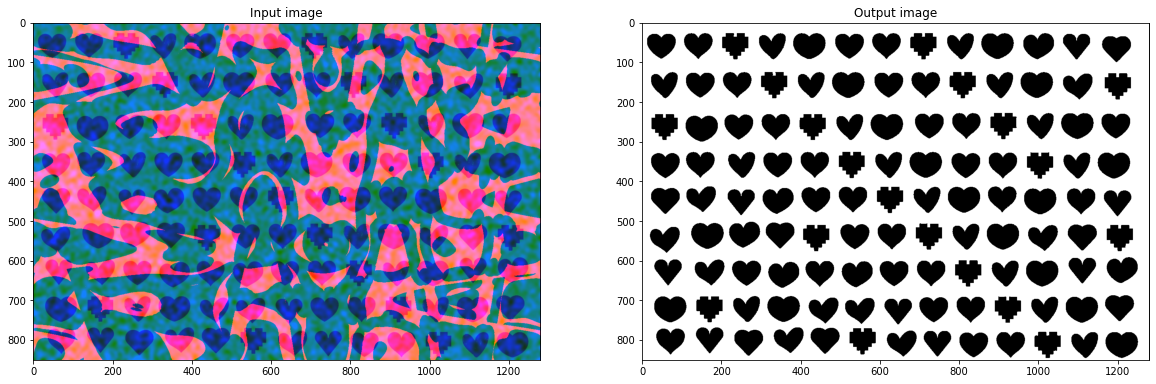

In [11]:
image_3 = cv2.imread("hearts 3.png")
output_3 = get_hearts_3(image_3, "output_3.png")
show_images(image_3, output_3)

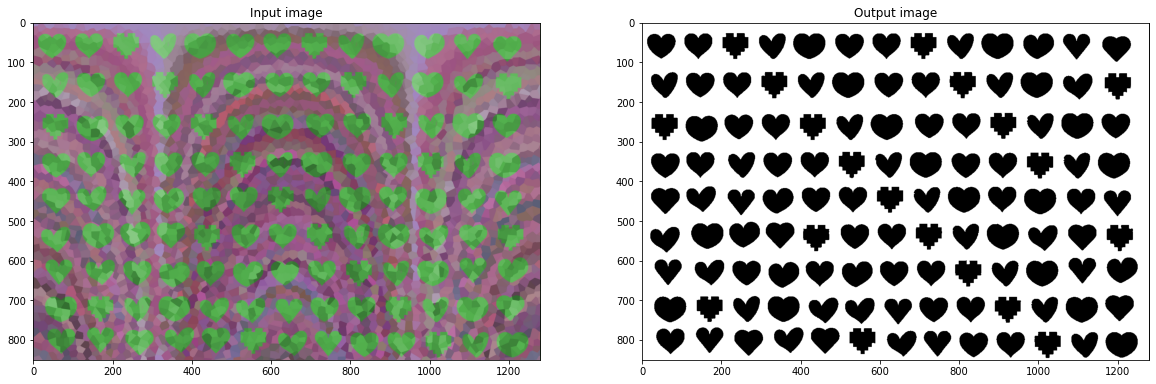

In [12]:
image_4 = cv2.imread("hearts 4.png")
output_4 = get_hearts_4(image_4, "output_4.png")
show_images(image_4, output_4)

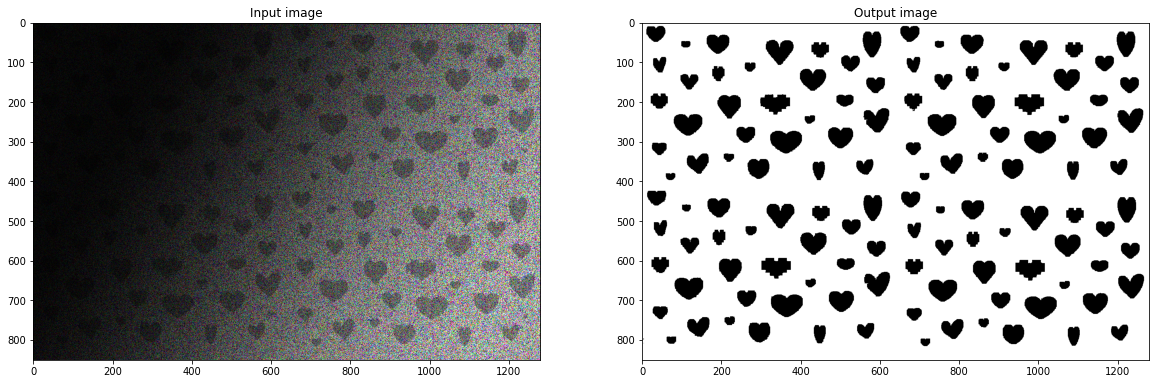

In [13]:
image_5 = cv2.imread("hearts 5.png")
output_5 = get_hearts_5(image_5, "output_5.png")
show_images(image_5, output_5)

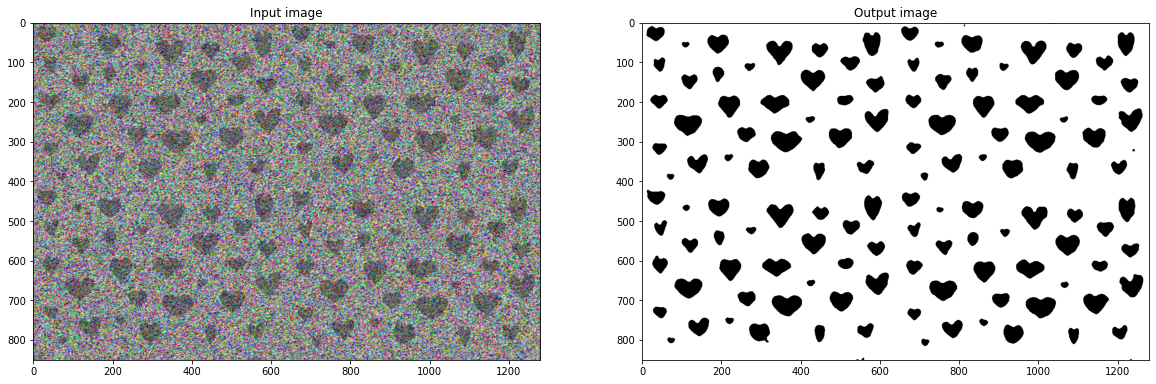

In [14]:
image_6 = cv2.imread("hearts 6.png")
output_6 = get_hearts_6(image_6, "output_6.png")
show_images(image_6, output_6)

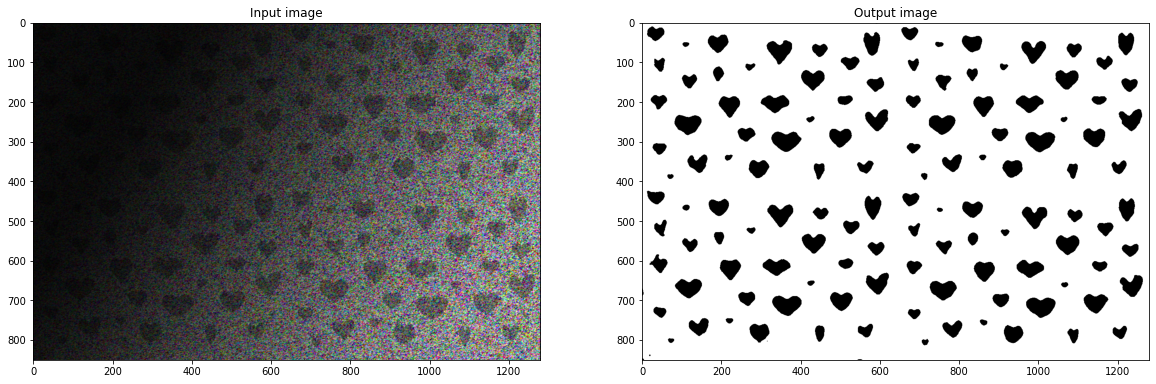

In [15]:
image_7 = cv2.imread("hearts 7.png")
output_7 = get_hearts_7(image_7, "output_7.png")
show_images(image_7, output_7)

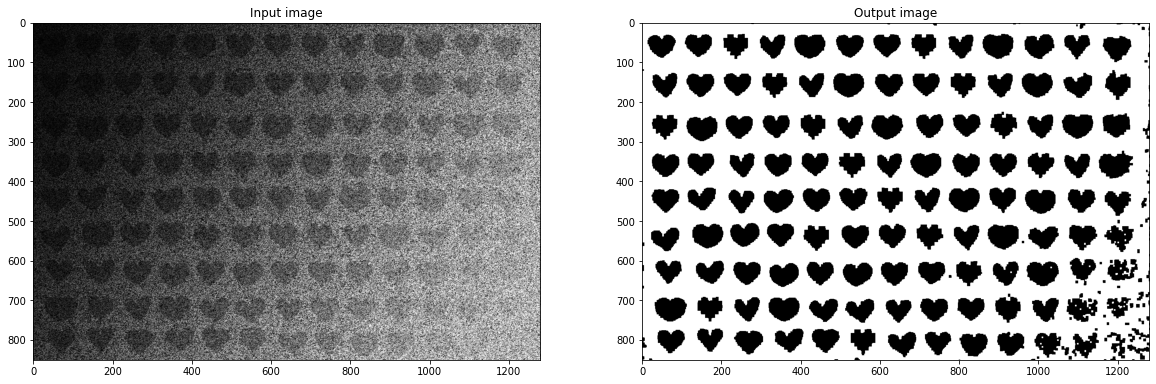

In [16]:
image_8 = cv2.imread("hearts 8.png")
output_8 = get_hearts_8(image_8, "output_8.png")
show_images(image_8, output_8)

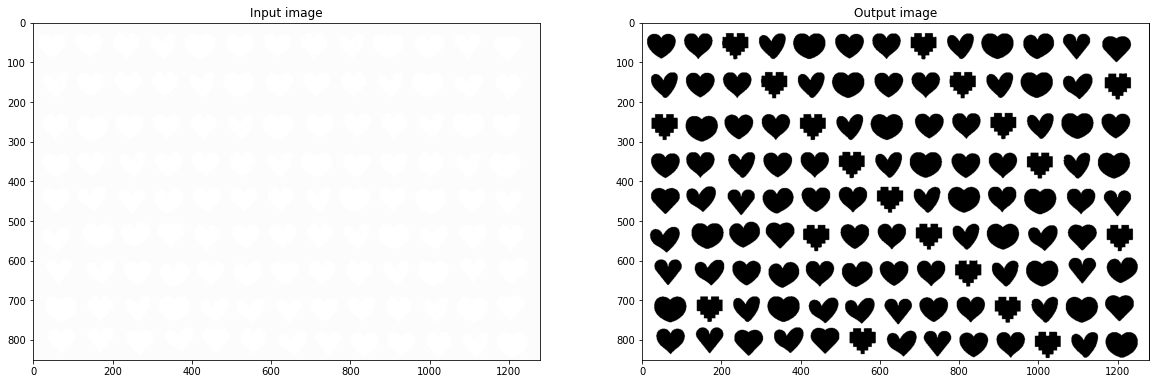

In [17]:
image_9 = cv2.imread("hearts 9.png")
output_9 = get_hearts_9(image_9, "output_9.png")
show_images(image_9, output_9)

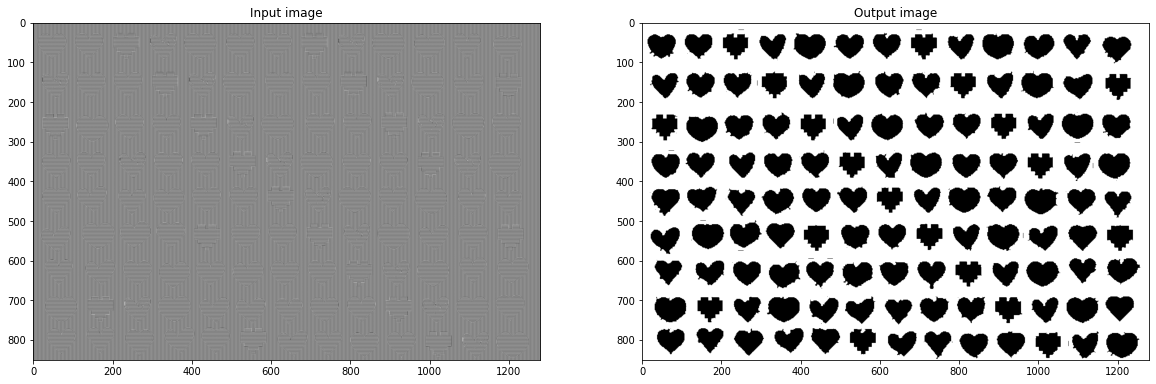

In [18]:
image_10 = cv2.imread("hearts 10.png")
output_10 = get_hearts_10(image_10, "output_10.png")
show_images(image_10, output_10)

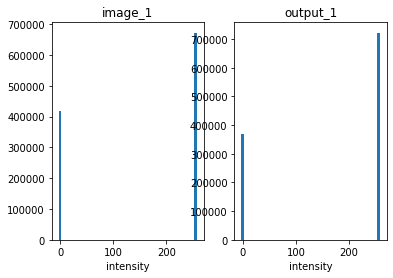

In [19]:
plot_hist(output_1, output_2, "image_1", "output_1")